In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# from tensorflow.examples.tutorials.mnist import input_data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
IMG_PATH = "/content/drive/My Drive/Colab Notebooks/idcard/*.jpg"

In [0]:
import glob, cv2
images = []
for img in glob.glob(IMG_PATH):
    images.append(cv2.resize(cv2.imread(img,cv2.IMREAD_GRAYSCALE),(28,28)))

In [0]:
len(images)

45

In [0]:
images[0].shape

(28, 28)

In [0]:
# mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/", one_hot=True)

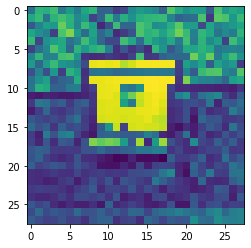

In [0]:
plt.imshow(images[20])

In [0]:
def generator(z, reuse=None):
  with tf.variable_scope('gen',reuse=reuse):
    hidden1 = tf.layers.dense(inputs=z,units=128)
    
    alpha = 0.01
    hidden1 = tf.maximum(alpha*hidden1,hidden1)
    
    hidden2 = tf.layers.dense(inputs=hidden1,units=128)
    
    hidden2 = tf.maximum(alpha*hidden2,hidden2)
    
    output = tf.layers.dense(hidden2,units=784,activation=tf.nn.tanh)
    
    return output
  

In [0]:
def discriminator(x, reuse=None):
  with tf.variable_scope('dis',reuse=reuse):
    hidden1 = tf.layers.dense(inputs=x,units=128)
    
    alpha = 0.01
    hidden1 = tf.maximum(alpha*hidden1,hidden1)
    
    hidden2 = tf.layers.dense(inputs=hidden1,units=128)
    
    hidden2 = tf.maximum(alpha*hidden2,hidden2)
    
    logits = tf.layers.dense(hidden2,units=1)
    output = tf.sigmoid(logits)
    
    return output,logits
  

In [0]:
real_images = tf.placeholder(tf.float32,shape=[None,784])
z = tf.placeholder(tf.float32,shape=[None,100])

In [0]:
G = generator(z)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [0]:
D_output_real, D_logits_real = discriminator(real_images)
D_output_fake, D_logits_fake = discriminator(G,reuse=True)

In [0]:
# LOSSES

def loss_func(logits_in,labels_in):
  return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
  logits=logits_in,labels=labels_in))

In [0]:
D_real_loss = loss_func(D_logits_real,tf.ones_like(D_logits_real)*0.9)
D_fake_loss = loss_func(D_logits_fake,tf.zeros_like(D_logits_real))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
D_loss = D_real_loss + D_fake_loss

In [0]:
G_loss = loss_func(D_logits_fake,tf.ones_like(D_logits_fake))

In [0]:
learning_rate = 0.001

In [0]:
tvars = tf.trainable_variables()

d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

In [0]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss,var_list=d_vars)

In [0]:
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss,var_list=g_vars)

In [0]:
d_vars

[<tf.Variable 'dis/dense/kernel:0' shape=(784, 128) dtype=float32_ref>,
 <tf.Variable 'dis/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dis/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'dis/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dis/dense_2/kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'dis/dense_2/bias:0' shape=(1,) dtype=float32_ref>]

In [0]:
batch_size = 15
epochs = 200

In [0]:
init = tf.global_variables_initializer()

In [0]:
samples = []
saver = tf.train.Saver(var_list=g_vars)

In [0]:
def next_batch(total_images, batch_number, batch_size):

  return total_images[batch_number * batch_size : batch_number*batch_size + batch_size]

In [0]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for e in range(epochs):
        num_batches = 3
        
        for i in range(num_batches):
            
            batch_images = next_batch(images, i, batch_size)
            # batch = np.array(batch).flatten()
            
            batch_images = batch.reshape((batch_size, 784))
            # batch_images = batch_images*2 - 1

            batch_z = np.random.uniform(-1, 1, size=(batch_size, 100))
            
            _ = sess.run(D_trainer, feed_dict={real_images: batch_images, z: batch_z})
            _ = sess.run(G_trainer, feed_dict={z: batch_z})
        
            
        if epochs%5==0:
          print("Currently on Epoch {} of {} total...".format(e+1, epochs))
        
        sample_z = np.random.uniform(-1, 1, size=(1, 100))
        gen_sample = sess.run(generator(z ,reuse=True),feed_dict={z: sample_z})
        
        samples.append(gen_sample)
        
        saver.save(sess, './models/30_epoch_model.ckpt')

In [0]:
saver = tf.train.Saver(var_list=g_vars)

new_samples = []
with tf.Session() as sess:
    
    saver.restore(sess,'./models/30_epoch_model.ckpt')
    
    for x in range(5):
        sample_z = np.random.uniform(-1,1,size=(1,100))
        gen_sample = sess.run(generator(z,reuse=True),feed_dict={z:sample_z})
        
        new_samples.append(gen_sample)

INFO:tensorflow:Restoring parameters from ./models/30_epoch_model.ckpt


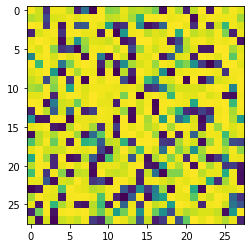

In [0]:
plt.imshow(new_samples[4].reshape(28,28))